In [3]:
import os
if os.getcwd().split('/')[-1] == 'eda':
    os.chdir('../..')

import numpy as np
import pandas as pd
from utils.data_loader import DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
data_conf = {
    "api": "local_data",
    "source_path": "data/data_markets_2023-06-15/",
#     "symbols": "['SPY', 'EWJ', 'ASHR', 'EWZ', 'VGK']",
    "symbols": "['SPY', 'EWJ', 'ASHR', 'VGK']",
}

data_loader = DataLoader(data_conf)
data_loader.load_data(save_as_csv=False)
margin = 0.03
n_future_days_target = 63
all_datasets = data_loader.get_datasets_for_scenario_prediction(margin, n_future_days_target)

# combined dataset:
for i, symbol in enumerate(all_datasets.keys()):
    if i ==0:
        df_combined = all_datasets[symbol]
    else:
        df_combined = pd.concat([df_combined, all_datasets[symbol]], axis=0)
all_datasets['combined'] = df_combined

print('\n')
for symbol in all_datasets.keys():
    n_rows = all_datasets[symbol].shape[0]
    up = sum(all_datasets[symbol]['target'] =='up')
    down = sum(all_datasets[symbol]['target'] =='down')
    flat = sum(all_datasets[symbol]['target'] =='flat')
    print(f'{symbol} - up: {round(100*up/n_rows)}%, flat: {round(100*flat/n_rows)}%, down: {round(100*down/n_rows)}%')

 ... load: SPY
 ... load: EWJ
 ... load: ASHR
 ... load: VGK


SPY - up: 52%, flat: 27%, down: 21%
EWJ - up: 42%, flat: 26%, down: 32%
ASHR - up: 41%, flat: 25%, down: 35%
VGK - up: 48%, flat: 25%, down: 28%
combined - up: 47%, flat: 26%, down: 28%


symbol: SPY


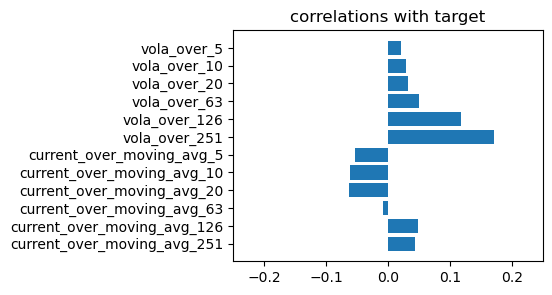

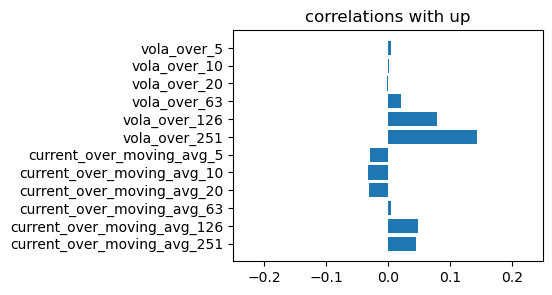

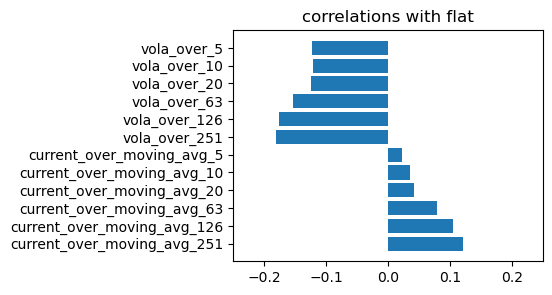

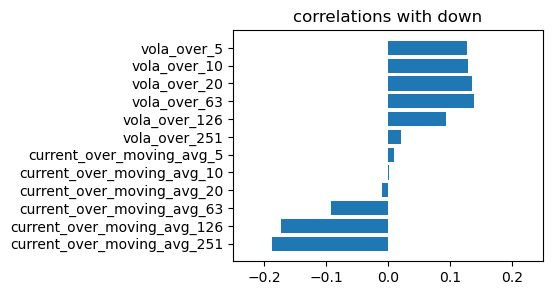

symbol: EWJ


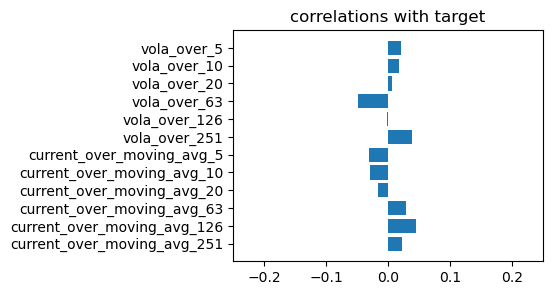

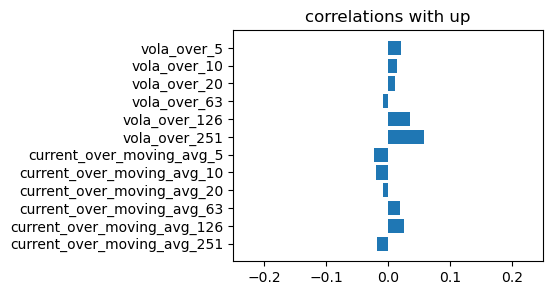

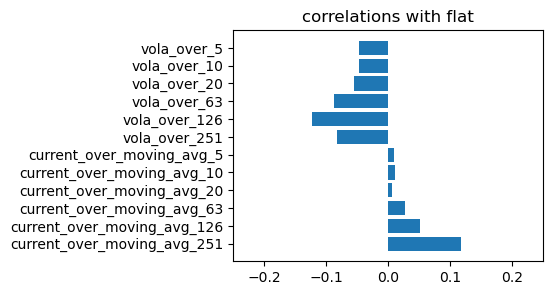

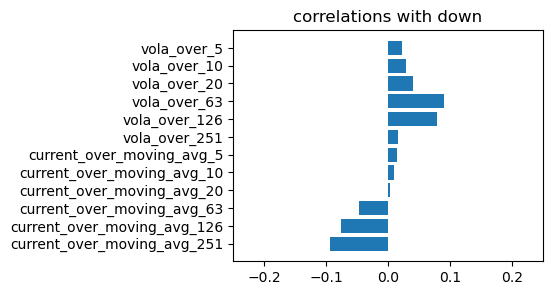

symbol: ASHR


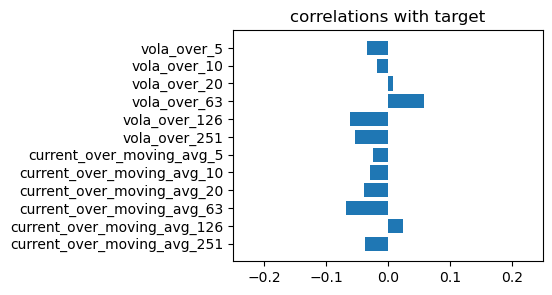

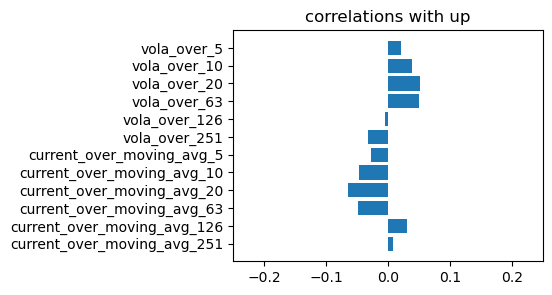

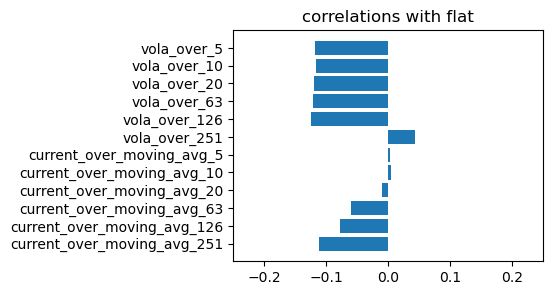

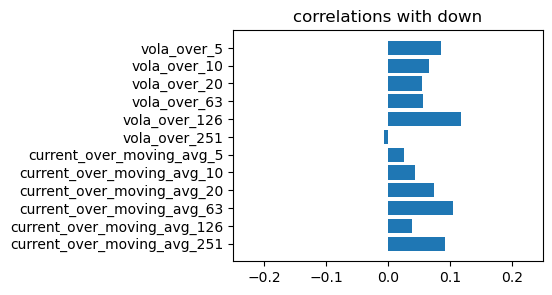

symbol: VGK


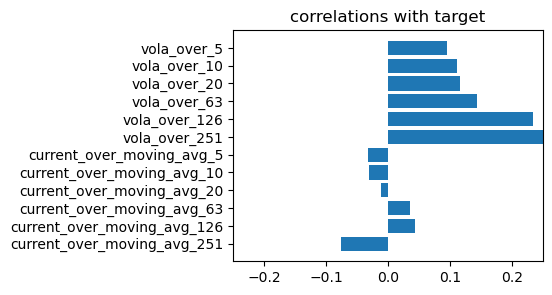

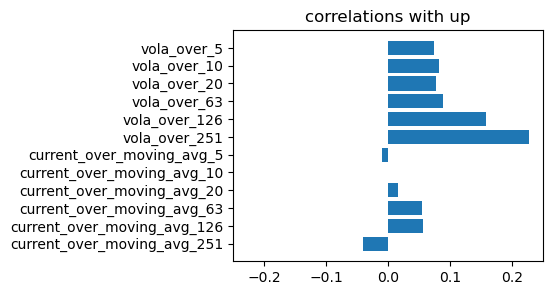

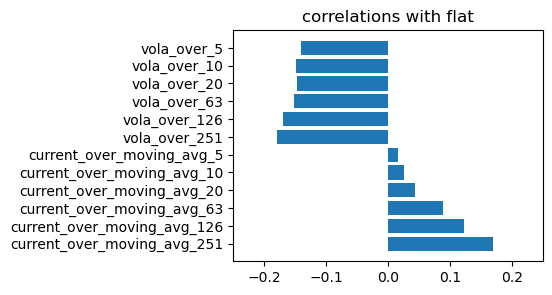

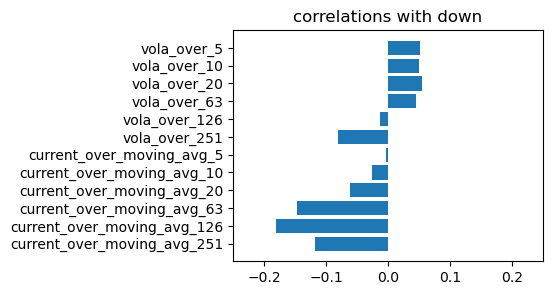

symbol: combined


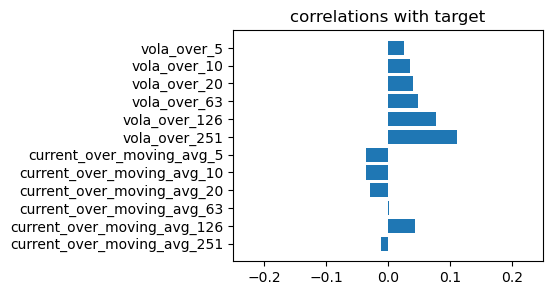

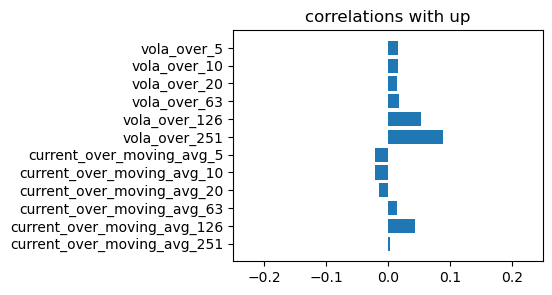

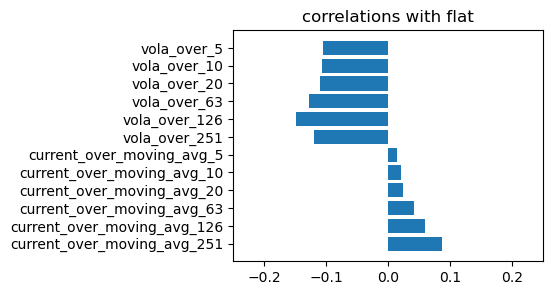

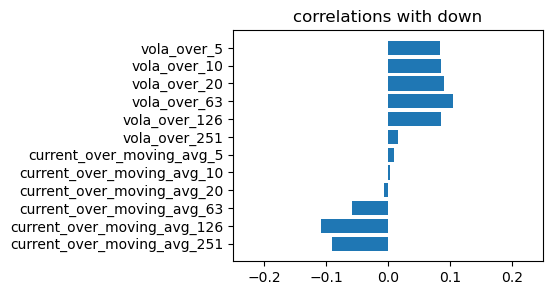

In [7]:
def get_correlations(all_datasets, symbol):
    df = all_datasets[symbol]
    df['up'] = df['target'].apply(lambda x: int(x=='up'))
    df['flat'] = df['target'].apply(lambda x: int(x=='flat'))
    df['down'] = df['target'].apply(lambda x: int(x=='down'))
    df_ = df.drop(['price', 'price_normalized', 'target'], axis=1)
    scaler = StandardScaler()
    scaler.fit(df_)
    dat = scaler.transform(df_)
    corr_ = np.corrcoef(dat, rowvar=False)
    corr_with_target = corr_[:,-4]
    corr_with_up = corr_[:,-3]
    corr_with_flat = corr_[:,-2]
    corr_with_down = corr_[:,-1]
    return corr_with_target, corr_with_up, corr_with_flat, corr_with_down, df_.columns

plt.rcParams["figure.figsize"] = (4,3)
def bar_plot(corr_array, target, columns):
    arr1 = np.array([(col, corr) for col, corr in zip(columns, corr_array) if 'current_over_moving' in col])[::-1,:]
    arr2 = np.array([(col, corr) for col, corr in zip(columns, corr_array) if 'vola' in col])[::-1,:]
    arr = np.concatenate([arr1, arr2])
    plt.xlim(-0.25,0.25)
    plt.barh(arr[:,0], arr[:,1].astype('float'))
    plt.title(f'correlations with {target}')
    plt.show()

for symbol in all_datasets.keys():
    corr_with_target, corr_with_up, corr_with_flat, corr_with_down, columns = get_correlations(all_datasets, symbol)
    print(f'symbol: {symbol}')
    bar_plot(corr_with_target, 'target', columns)
    bar_plot(corr_with_up, 'up', columns)
    bar_plot(corr_with_flat, 'flat', columns)
    bar_plot(corr_with_down, 'down', columns)